In [3]:
!pip install mlxtend

In [36]:
#import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

/Users/ada-eze/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/ada-eze/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [5]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

 Histogram plots to show the distribution of some items purchased by customers

<AxesSubplot:xlabel='Skirt', ylabel='count'>

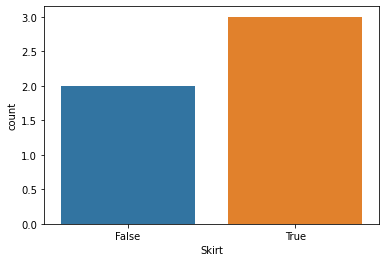

In [37]:
sns.countplot(df['Skirt'])

A good amount of skirts were Purchased

<AxesSubplot:xlabel='Pants', ylabel='count'>

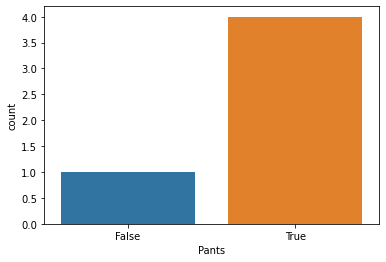

In [38]:
sns.countplot(df['Pants'])

<AxesSubplot:xlabel='Necklace', ylabel='count'>

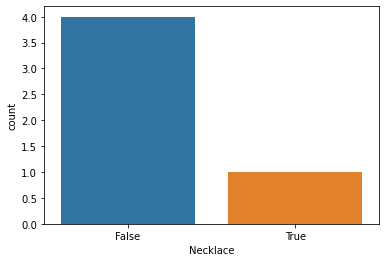

In [39]:
sns.countplot(df['Necklace'])

<AxesSubplot:xlabel='Scarf', ylabel='count'>

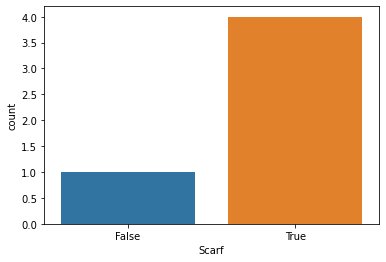

In [40]:
sns.countplot(df['Scarf'])

<AxesSubplot:xlabel='Sunglasses', ylabel='count'>

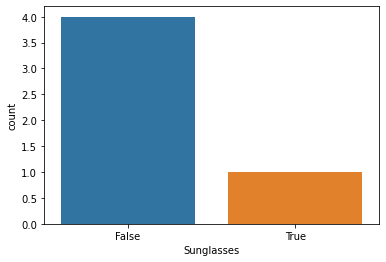

In [41]:
sns.countplot(df['Sunglasses'])

In [6]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [7]:
#Support

from mlxtend.frequent_patterns import apriori
apriori(df, min_support = 0.5)

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


In [8]:
apriori(df, min_support = 0.7)

,support,itemsets
0,0.8,(5)
1,0.8,(7)


In [16]:
frequent_itemset = apriori(df, min_support = 0.5, use_colnames= True) #Instead of column indices we can use column names.
frequent_itemset

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


In [17]:
#Confidence
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemset, metric = 'confidence', min_threshold = 0.5) #association items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


In [11]:
#Lift
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemset, metric = 'lift', min_threshold = 1.25) #association items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


In [12]:
market_data = pd.read_csv('Market_Basket_Optimisation.csv')

In [13]:
market_data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [21]:
import csv
csv_filename = 'Market_Basket_Optimisation.csv'
with open(csv_filename) as f:
    reader = csv.reader(f)
    market_data = list(reader)

In [22]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(market_data).transform(market_data)    #Apply one-hot-encoding on our dataset
data=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
data

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
data.describe()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
count,7501,7501,7501,7501,7501,7501,7501,7501,7501,7501,...,7501,7501,7501,7501,7501,7501,7501,7501,7501,7501
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,7500,7348,7434,7466,7251,7467,7436,7420,7394,7432,...,7032,7308,7498,7377,7431,7280,7062,7415,7296,7430


In [24]:
data.shape

(7501, 120)

In [27]:
 #Support

from mlxtend.frequent_patterns import apriori
apriori(data, min_support = 0.05)

,support,itemsets
0,0.087188,(15)
1,0.081056,(17)
2,0.059992,(23)
3,0.163845,(25)
4,0.080389,(30)
5,0.051060,(31)
6,0.179709,(37)
7,0.079323,(40)
8,0.170911,(43)
9,0.063325,(48)


In [28]:
frequent_itemset = apriori(data, min_support = 0.05, use_colnames= True) #Instead of column indices we can use column names.
frequent_itemset

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


# Support 

Support is the frequency of an item or an itemset.
Support: quantify how many times an item or an itemset appear in a set of transactions.
In other words, support quantifies the frequency of an itemset.

From the result of the support table shown above, We can tell that MINERAL WATER having a support of 0.238 is the most frequently bought item.

In [30]:
#Confidence
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemset, metric = 'confidence', min_threshold = 0.05) #association items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314


# Confidence

Confidence: After buying an item X what’s the probability of buying item Y.

X being the Antecedent and Y being the Consequent. From the result of the confidence table plotted from the most frequent itemset, the common pairs are; 
Chocolate ⋒ Mineral Water,
Mineral Water ⋒ Eggs,
Mineral water ⋒ Spaghetti. (Note here that ⋒ means "and").

The pair with the highest confidence rate is Spaghetti and Mineral water with a rate of 34.3%. this goes to show that customers that buy Spaghetti have the likely hood to buy Mineral water as well.

In [31]:
#Lift
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemset, metric = 'lift', min_threshold = 1.00) #association items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314


In [34]:
#Lift
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemset, metric = 'lift', min_threshold = 0) #association items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314


# Lift

Lift: What’s the probability to buy items X and Y together rather than just buying item X.

Lift >1 = that the two items are most likely to be bought together.
Lift <1 = that the two items ae more likely to be bought seperately.
lift =1 = ther is no association between the two items.

from the result above, it shows that Spaghetti and Mineral water are more likely to be bought together.